In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

In [2]:
def getVWAP(price, vol):
    "Uses np cumsum to calculate vwap"
    return np.cumsum(vol * price) / np.cumsum(vol)
symbol = 'GME' #Note I chose GME because its graph is more interesting than THRM.V
start = '2021-01-29'
end = '2021-01-30'
interval = '1m'

In [3]:
# Question 1
data = yf.download(symbol, start, end, interval='1m')

[*********************100%***********************]  1 of 1 completed


In [4]:
data['vwap'] = getVWAP(data['Adj Close'], data['Volume'])
data

,Open,High,Low,Close,Adj Close,Volume,vwap
Datetime,,,,,,,
2021-01-29 09:30:00-05:00,398.000000,398.989899,392.497101,392.497101,392.497101,5705952,392.497101
2021-01-29 09:31:00-05:00,394.939911,413.980011,371.859985,372.170013,372.170013,632287,390.469321
2021-01-29 09:32:00-05:00,371.813812,374.989899,354.350006,354.350006,354.350006,232792,389.189722
2021-01-29 09:37:00-05:00,350.000000,351.364990,329.700104,335.630005,335.630005,307045,386.798756
2021-01-29 09:38:00-05:00,329.709991,340.500000,301.500000,303.599701,303.599701,587354,380.252944
...,...,...,...,...,...,...,...
2021-01-29 15:55:00-05:00,326.769989,326.769989,312.000000,317.260010,317.260010,326579,326.124833
2021-01-29 15:56:00-05:00,318.000000,321.806488,315.000000,321.000000,321.000000,195739,326.103704
2021-01-29 15:57:00-05:00,321.750000,328.000000,321.000000,327.000000,327.000000,312729,326.109569


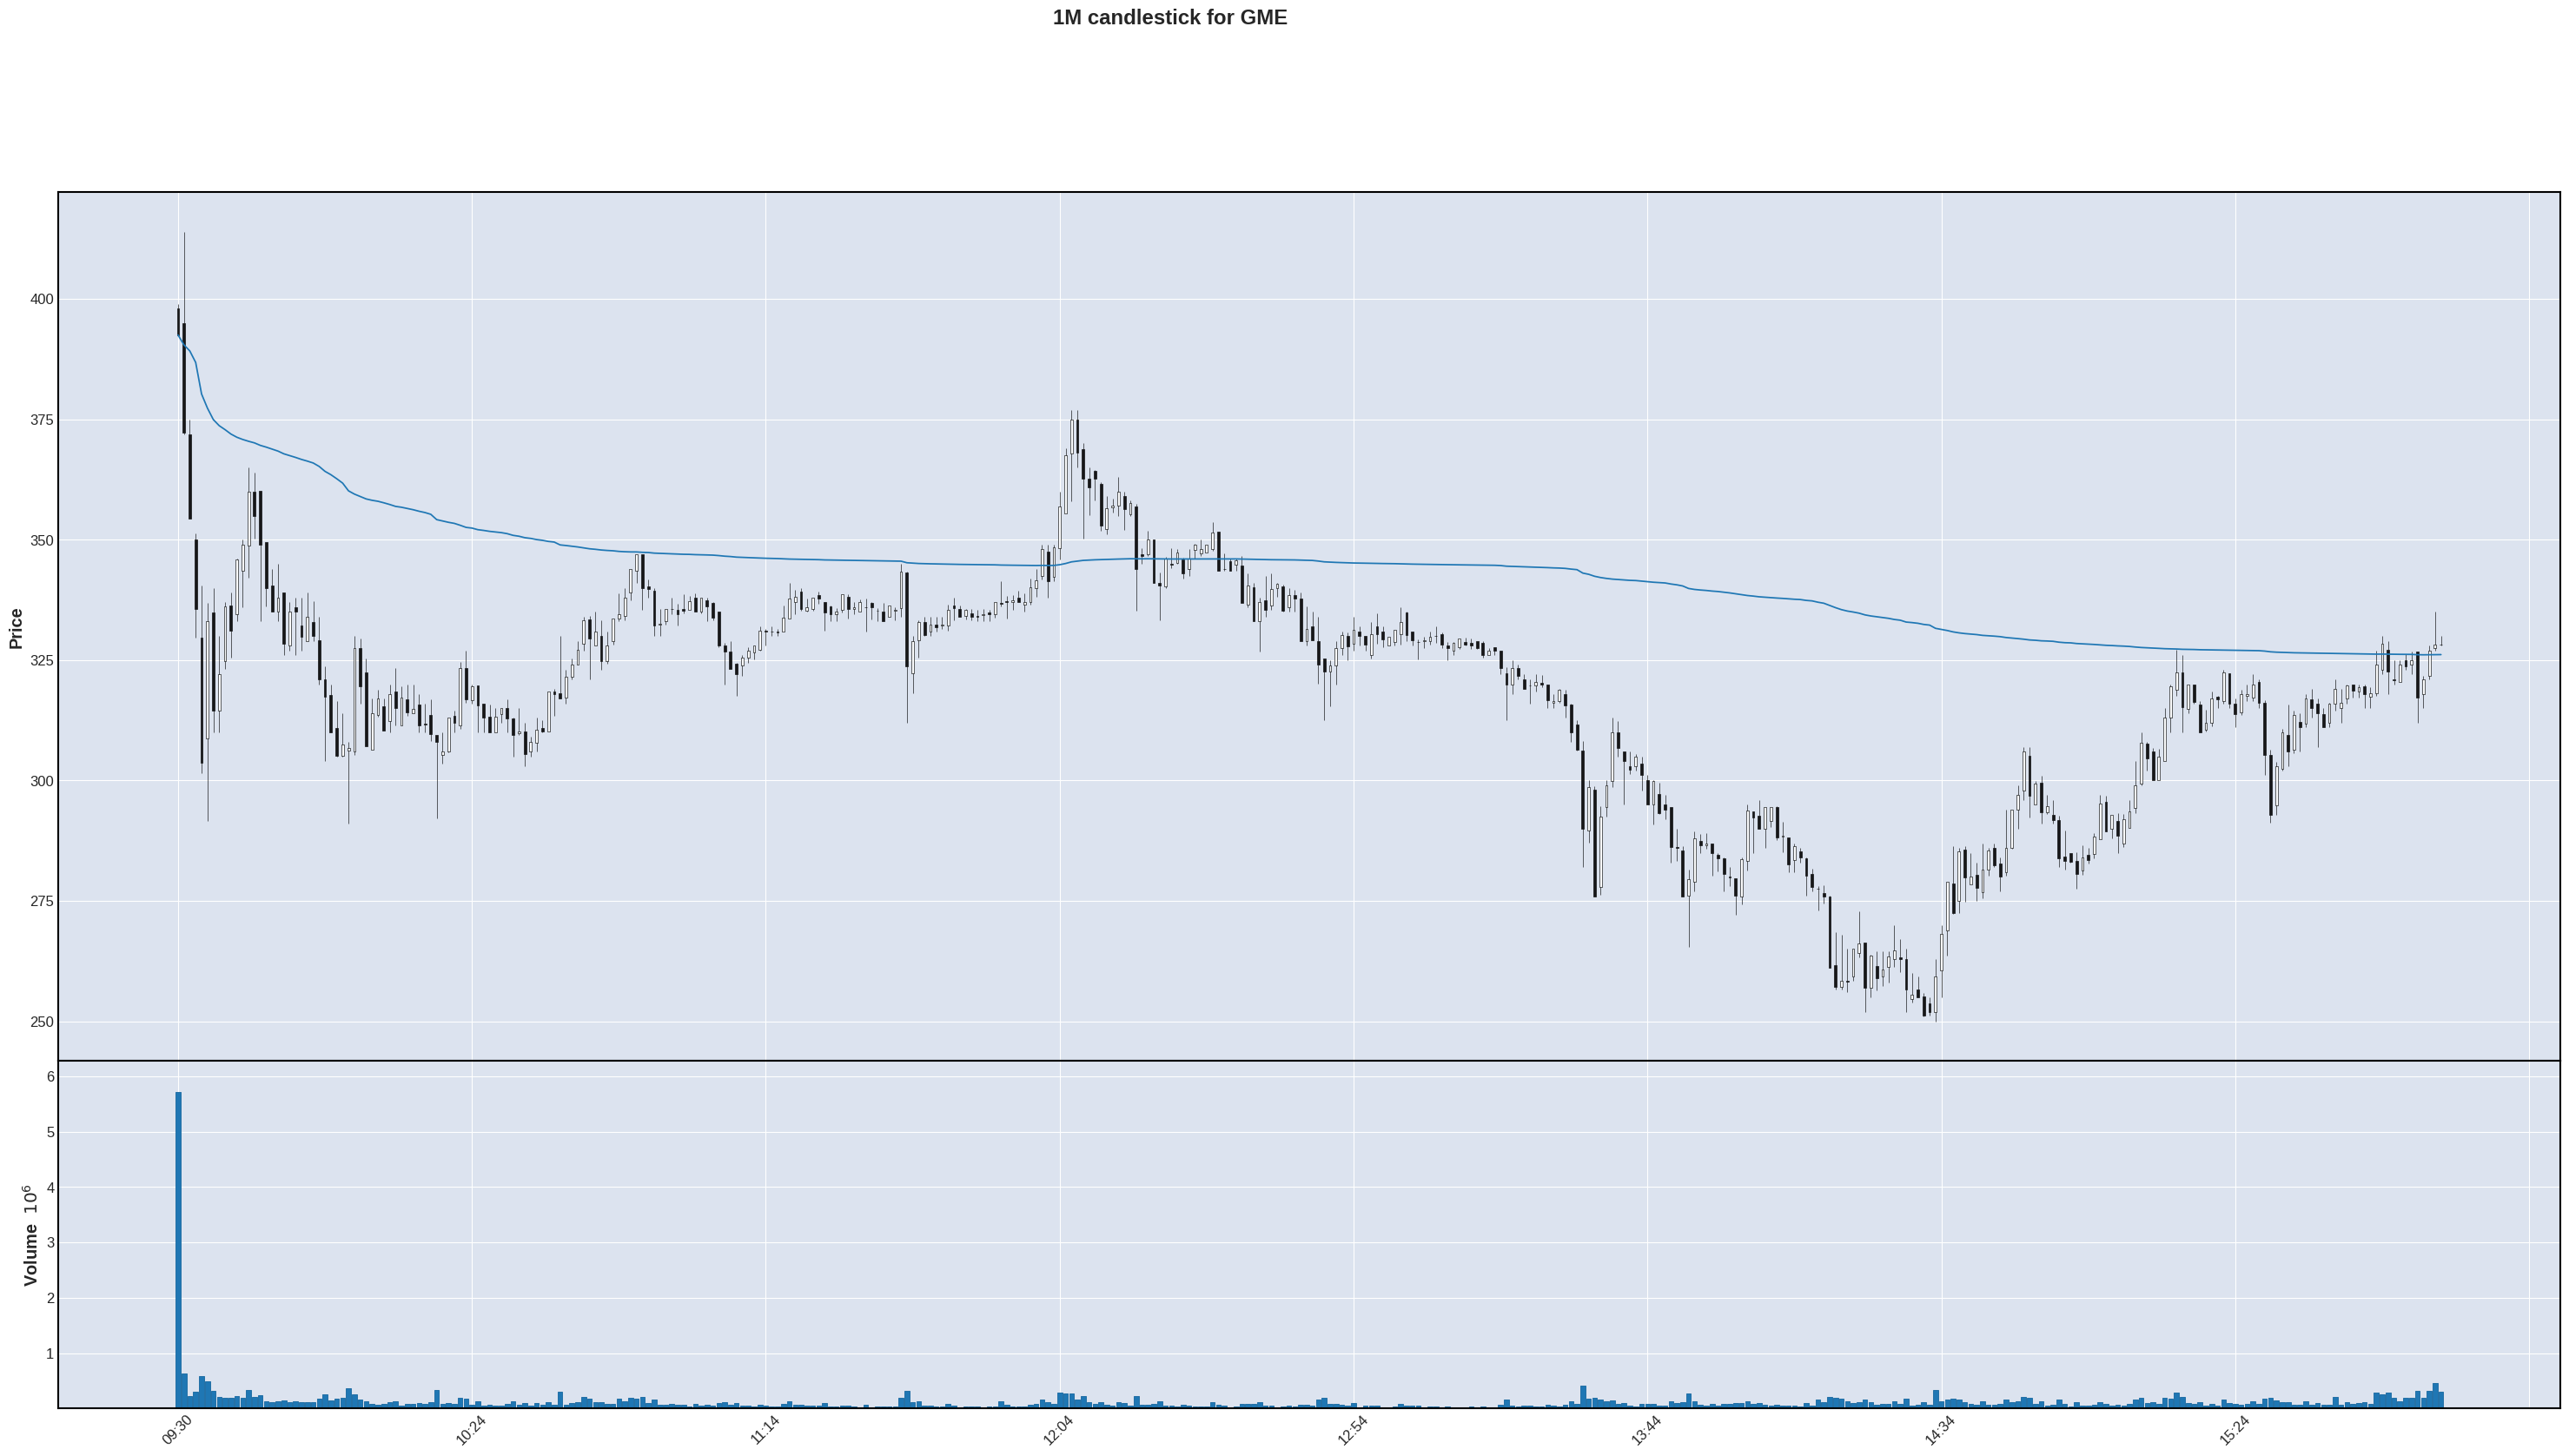

In [5]:
# Plot Data
import matplotlib.pyplot as plt
import mplfinance as mpf

addplot = mpf.make_addplot(data['vwap'])
#kwargs = dict(type='candle',volume=True)
#mplf.plot(data, **kwargs, style='yahoo', addplot=addplot, title='1M candlestick chart for BILI at 2021-01-25')
mpf.plot(data,type='candle', volume=True, addplot=addplot, title=f"1M candlestick for {symbol}", figsize=(40,20))

In [6]:
# Question 2
start = '2018-10-10'
end = '2020-12-31'
data2 = yf.download(symbol, start, end)
data2['vwap'] = getVWAP(data2['Adj Close'], data2['Volume'])
#data.reset_index(inplace = True)
#data['ts'] = data['Datetime'].values.astype(np.int64) // 10 ** 9
data2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,vwap
Date,,,,,,,
2018-10-10,14.810000,15.170000,14.810000,14.830000,13.944924,1962600,13.944924
2018-10-11,14.790000,15.100000,14.650000,14.660000,13.785069,2096000,13.862370
2018-10-12,14.900000,15.150000,14.700000,14.800000,13.916715,1927600,13.879869
2018-10-15,14.810000,15.070000,14.780000,14.880000,13.991940,1500100,13.902326
2018-10-16,14.970000,15.300000,14.780000,15.290000,14.377470,2040200,14.004083
...,...,...,...,...,...,...,...
2020-12-23,20.170000,22.350000,19.129999,20.570000,20.570000,25830300,8.429560
2020-12-24,21.010000,21.480000,19.950001,20.150000,20.150000,6262200,8.452429
2020-12-28,21.309999,21.969999,20.350000,20.990000,20.990000,8965900,8.487356


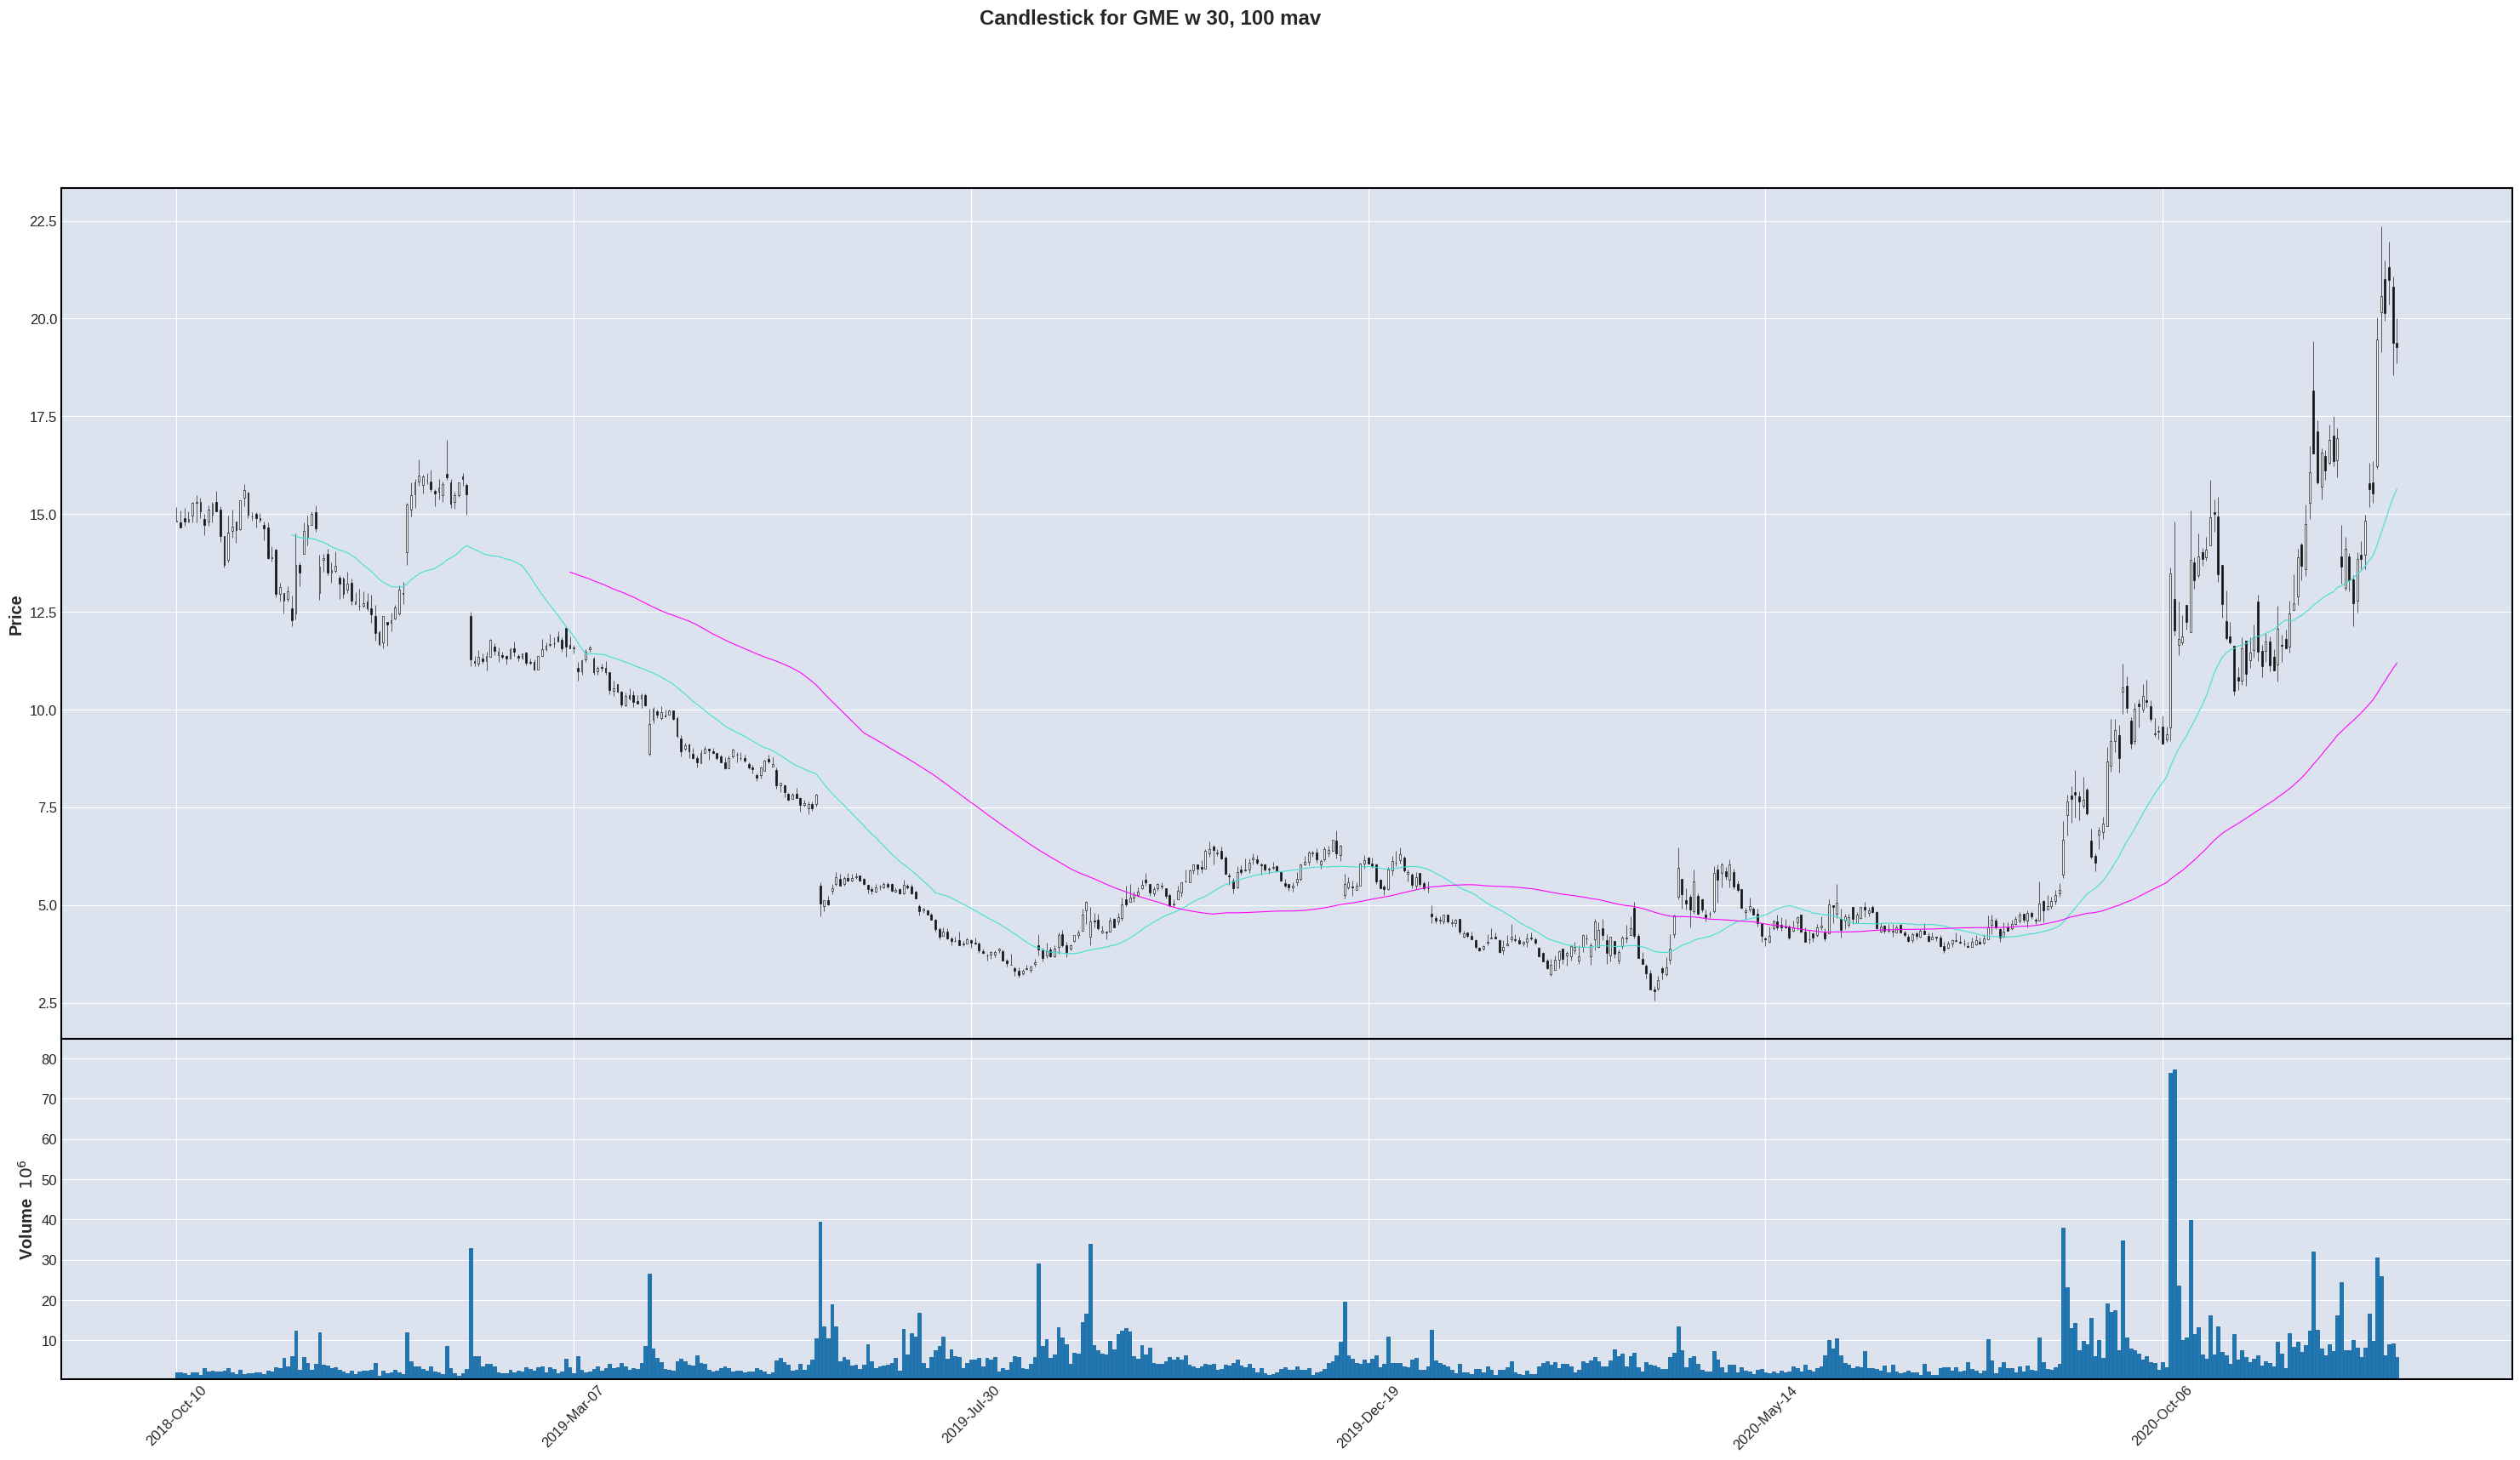

In [7]:
mpf.plot(data2,type='candle', volume=True, title=f"Candlestick for {symbol} w 30, 100 mav", figsize=(40,20), mav=(30,100))

In [8]:
# Question 3:
data2['daily_return'] = np.log(data2['Adj Close'] / data2['Adj Close'].shift(1))
data2.head()

,Open,High,Low,Close,Adj Close,Volume,vwap,daily_return
Date,,,,,,,,
2018-10-10,14.81,15.17,14.81,14.83,13.944924,1962600,13.944924,NaN
2018-10-11,14.79,15.10,14.65,14.66,13.785069,2096000,13.862370,-0.011530
2018-10-12,14.90,15.15,14.70,14.80,13.916715,1927600,13.879869,0.009505
2018-10-15,14.81,15.07,14.78,14.88,13.991940,1500100,13.902326,0.005391
2018-10-16,14.97,15.30,14.78,15.29,14.377470,2040200,14.004083,0.027181


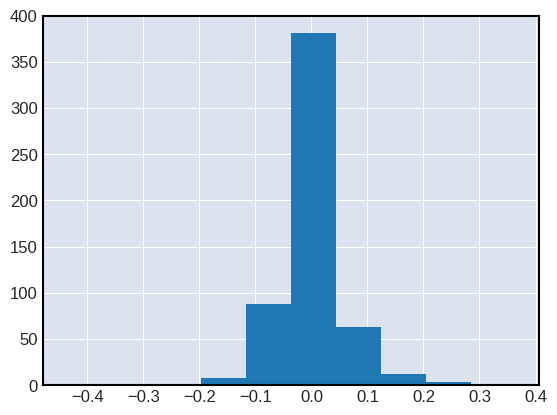

In [9]:
# Histogram Plot
plt.hist(data2['daily_return'])
plt.show()

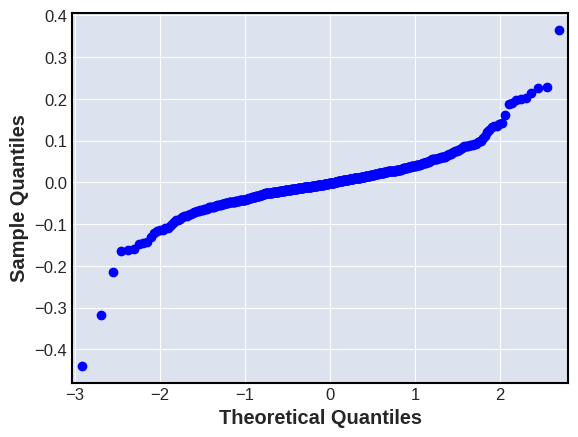

In [10]:
from statsmodels.graphics.gofplots import qqplot
# QQ Plot
qqplot(data2['daily_return'], line='s')
plt.show()

In [11]:
# Question 4
top_stocks = ['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES']
start = '2020-06-01'
end = '2020-12-31'
top_data = yf.download(top_stocks, start, end)['Adj Close'].dropna()
spx_data = yf.download('SPY', start, end).dropna()

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
# 1) Calculate daily return for these stocks
daily_return = pd.DataFrame()
for stock in top_stocks:
    daily_return[stock] = np.log(top_data[stock] / top_data[stock].shift(1))
daily_return = daily_return.dropna()
daily_return

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES
Date,,,,,,,,,,
2020-06-02,0.013154,-0.004202,0.003742,0.019791,0.011731,-0.000137,0.001948,-0.001680,-0.002148,0.043655
2020-06-03,0.022394,-0.013260,-0.001649,0.031494,0.007263,-0.042834,-0.001333,-0.015245,0.020085,0.038898
2020-06-04,0.008278,-0.035072,0.023380,-0.008522,-0.020372,-0.001574,-0.010623,-0.001898,-0.000844,0.015290
2020-06-05,0.029460,0.018079,0.008668,0.056784,0.026193,-0.005458,0.018236,0.008891,0.027057,0.032697
2020-06-08,-0.003231,0.029604,0.007854,0.013874,0.013293,0.018551,0.012344,-0.002451,0.001710,0.045789
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,-0.004530,-0.007695,0.004658,0.005673,-0.007854,0.008796,-0.014505,-0.017433,-0.000690,0.028937
2020-12-24,0.003042,0.008341,-0.000194,-0.002107,-0.000544,0.008280,0.005919,0.002836,0.008688,-0.009410
2020-12-28,0.001088,-0.005182,0.001838,0.030831,0.009207,0.005154,-0.001822,-0.002290,-0.011769,0.001288


In [13]:
spx_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-01,303.619995,306.209991,303.059998,305.549988,301.712280,55758300
2020-06-02,306.549988,308.130005,305.100006,308.079987,304.210480,74267200
2020-06-03,310.239990,313.220001,309.940002,312.179993,308.259033,92567600
2020-06-04,311.109985,313.000000,309.079987,311.359985,307.449310,75794400
2020-06-05,317.230011,321.269989,317.160004,319.339996,315.329071,150524700
...,...,...,...,...,...,...
2020-12-23,368.279999,369.619995,367.220001,367.570007,367.570007,46201400
2020-12-24,368.079987,369.029999,367.450012,369.000000,369.000000,26457900
2020-12-28,371.739990,372.589996,371.070007,372.170013,372.170013,39000400


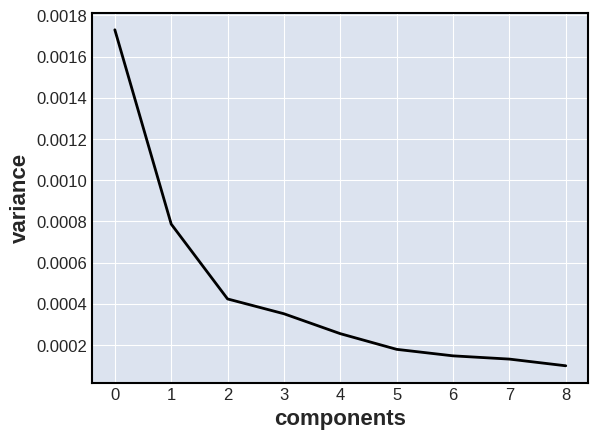

In [14]:
from sklearn import decomposition

# (2) PCA
daily_return
pca = decomposition.PCA()
pca.fit(daily_return.iloc[:, 1:])

plt.figure()
plt.plot(pca.explained_variance_, 'k', linewidth=2)
plt.xlabel('components', fontsize=16)
plt.ylabel('variance', fontsize=16)
plt.show()

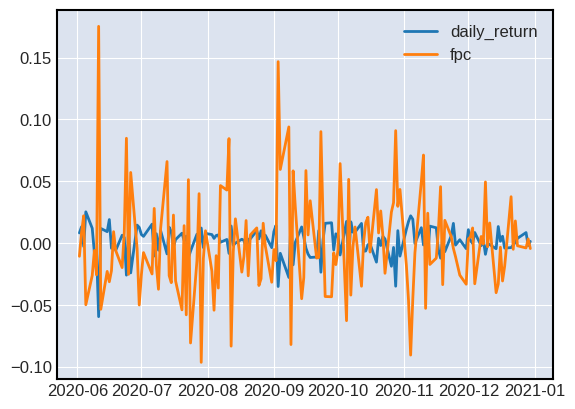

In [15]:
# S&P 500 daily return
sp_return = pd.DataFrame()
sp_return['daily_return'] = np.log(spx_data['Adj Close'] / spx_data['Adj Close'].shift(1)).dropna()
# FPC
pca_1 = decomposition.PCA(n_components=1)
pca_1.fit(daily_return)
sp_return['fpc'] = pca_1.transform(daily_return)
sp_return.reset_index(inplace = True)
# Plot
plt.plot(sp_return['Date'], sp_return['daily_return'], label='daily_return')
plt.plot(sp_return['Date'], sp_return['fpc'], label='fpc')
plt.legend()

In [16]:
np.corrcoef(sp_return['daily_return'], sp_return['fpc'])

array([[ 1.        , -0.76511076],
       [-0.76511076,  1.        ]])

In [17]:
# Question 5
start = '2020-06-01'
end = '2020-12-31'
set1 = yf.download('BB', start, end).dropna()
set2 = yf.download('NOK', start, end).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


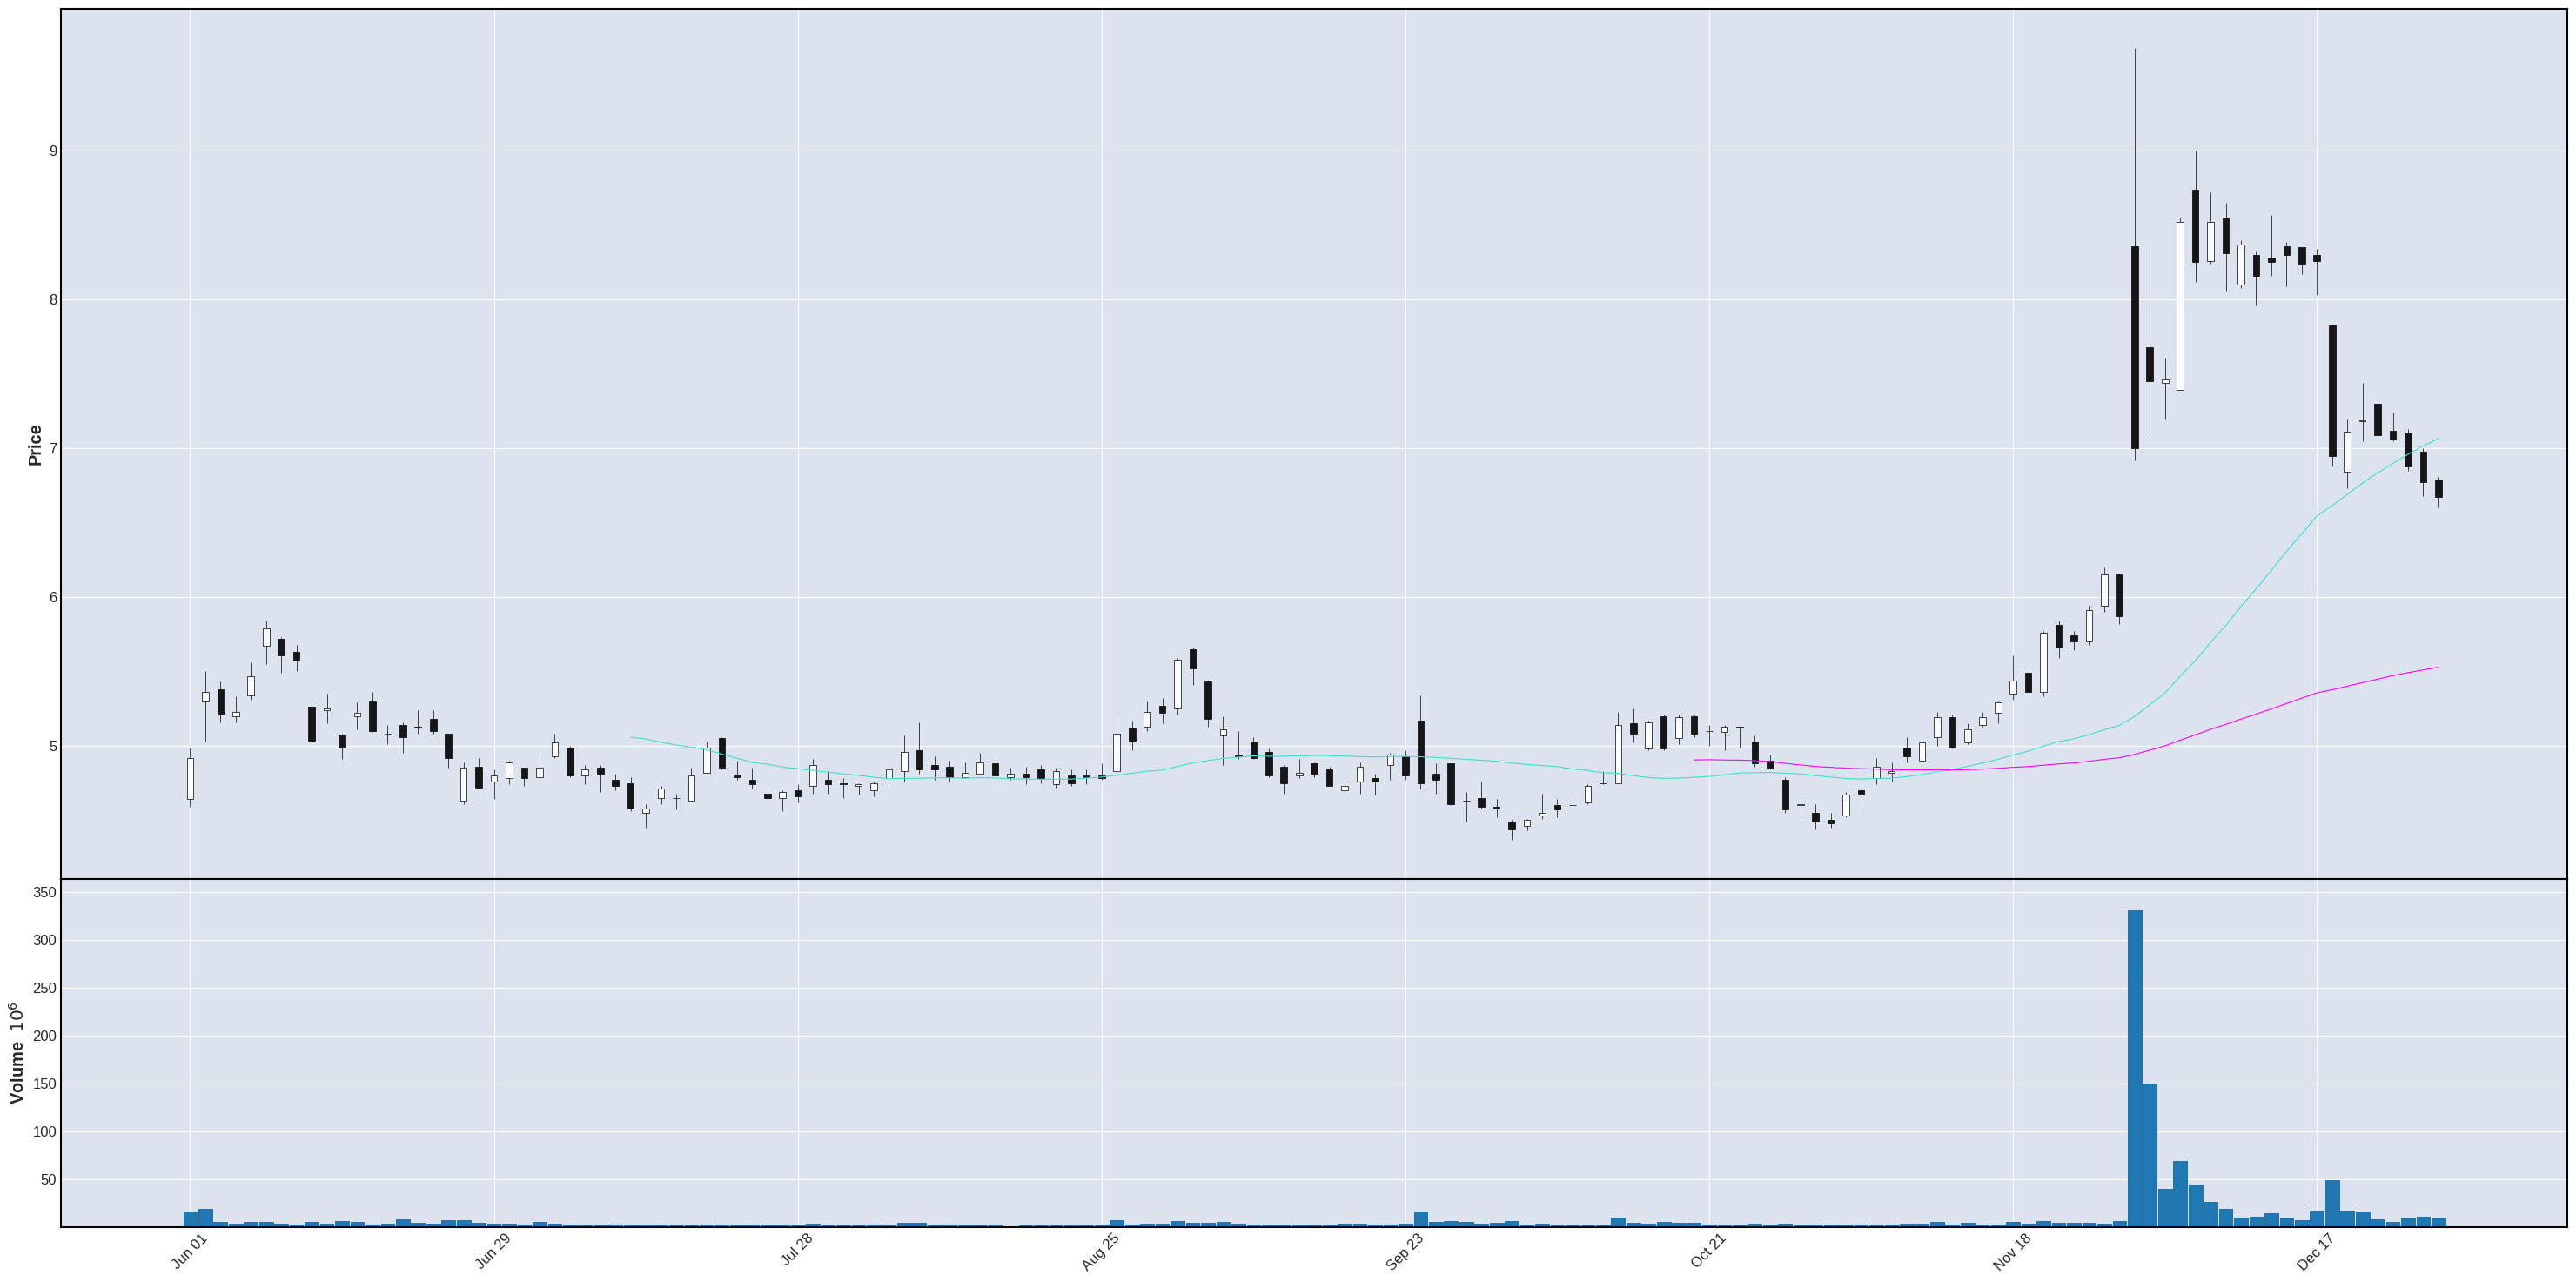

In [18]:
mpf.plot(set1,type='candle', volume=True, figsize=(40,20), mav=(30,100))

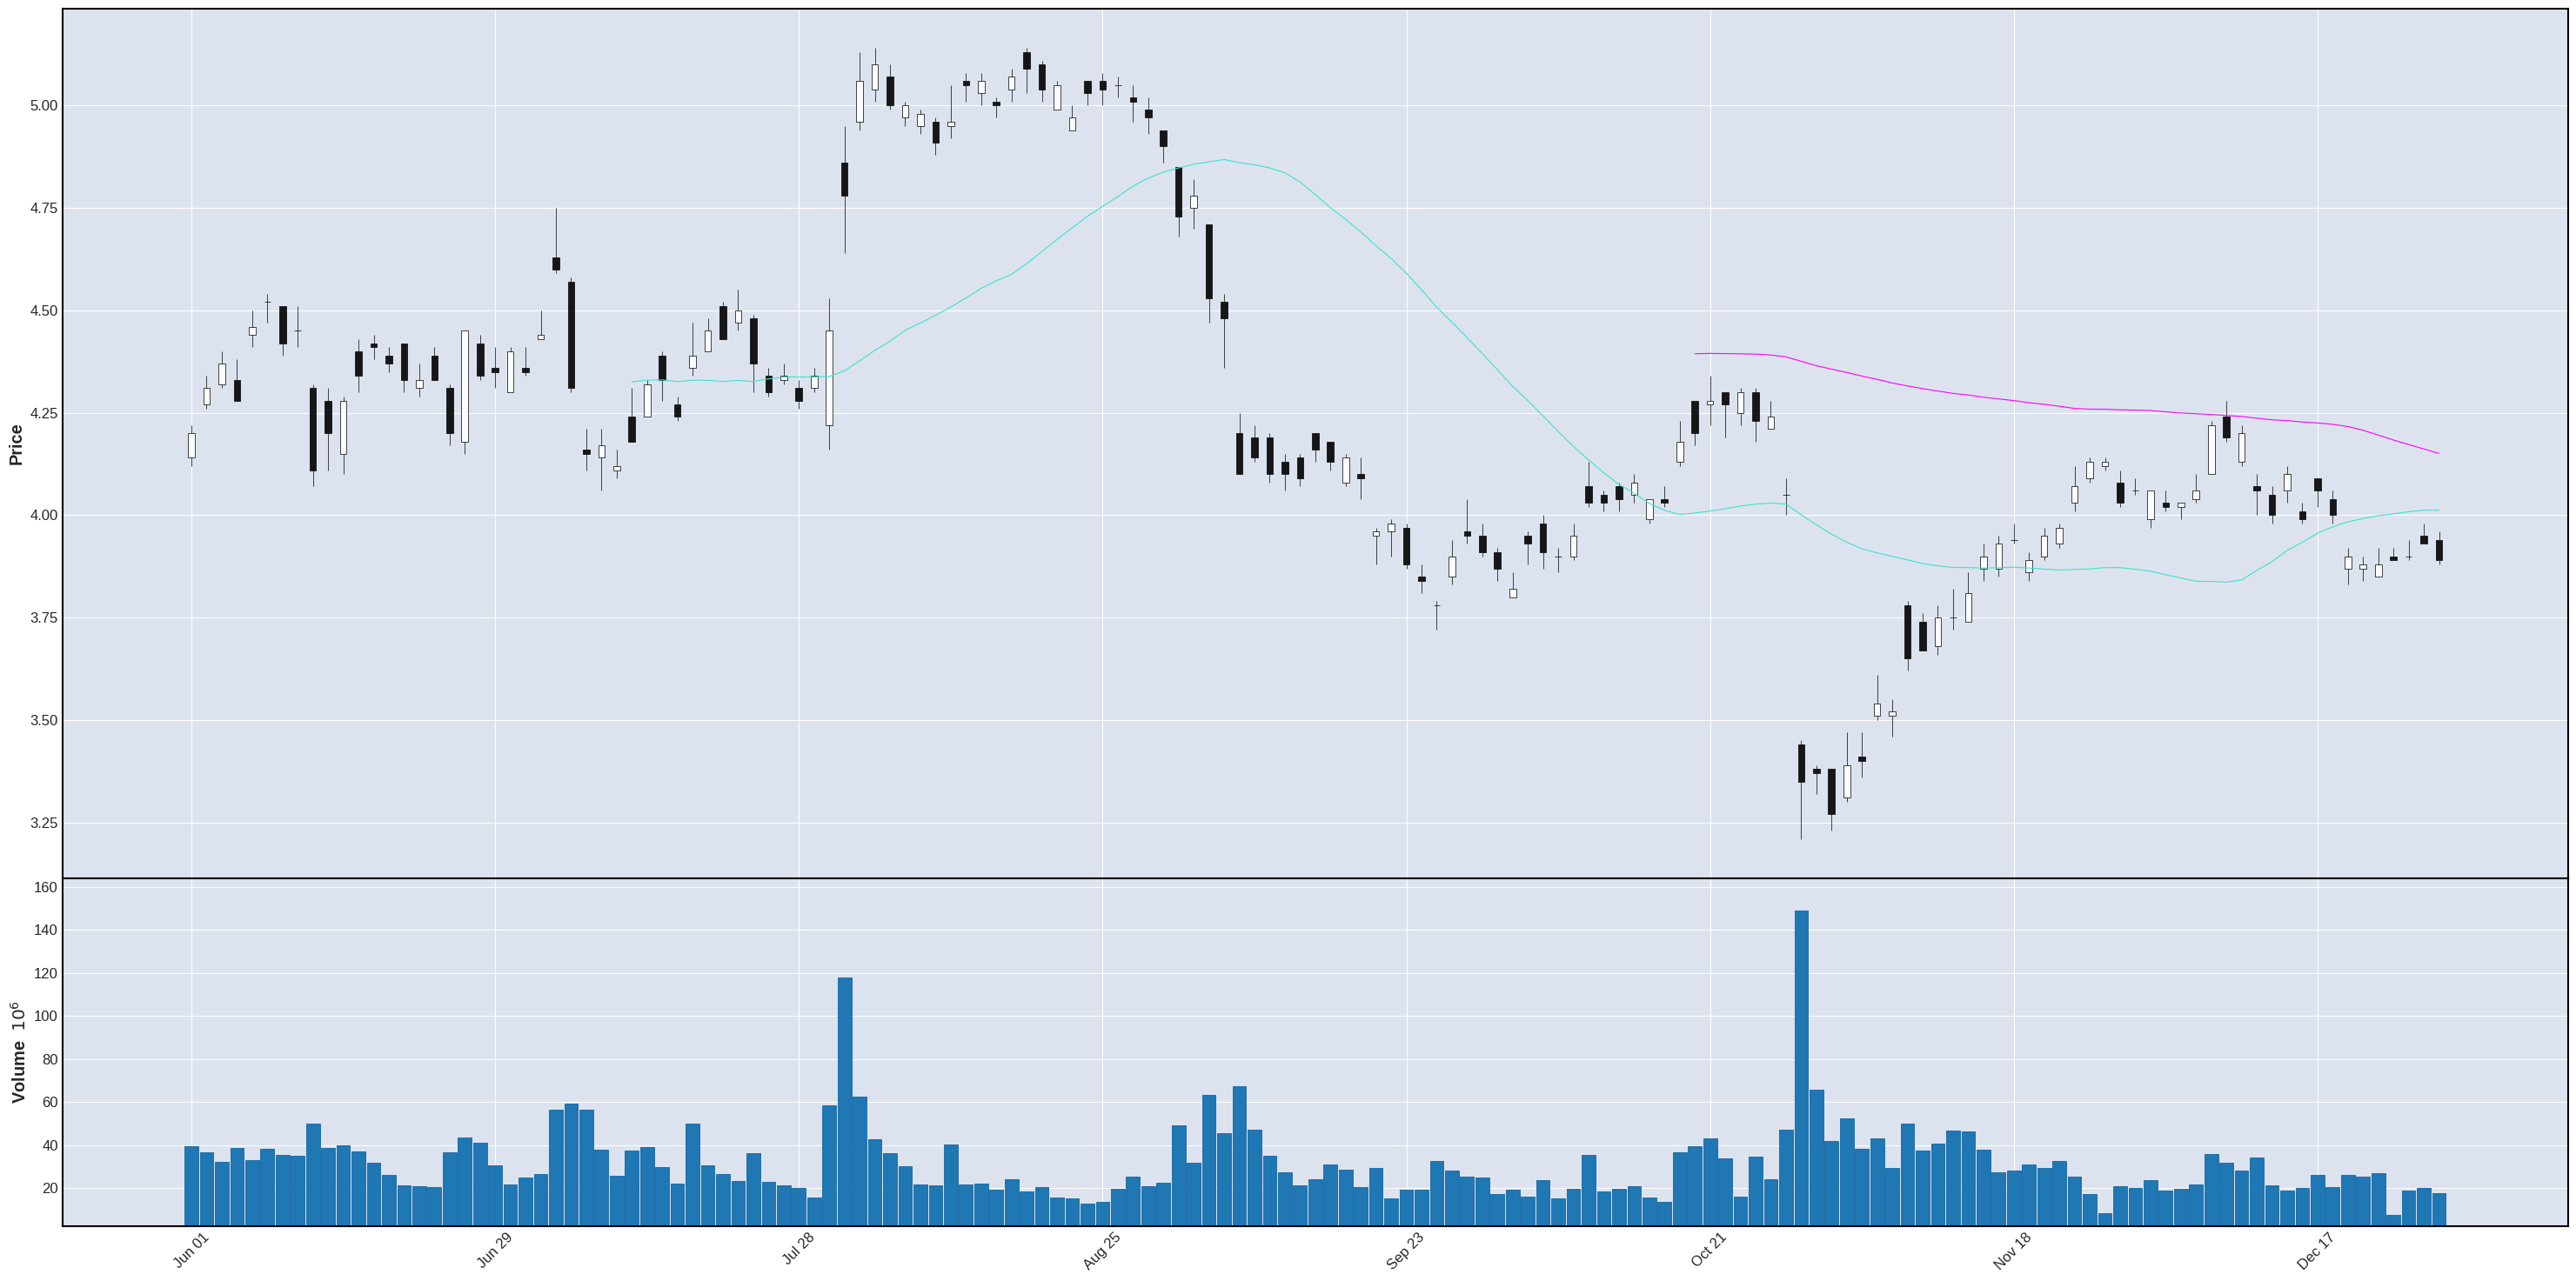

In [19]:
mpf.plot(set2,type='candle', volume=True, figsize=(40,20), mav=(30,100))

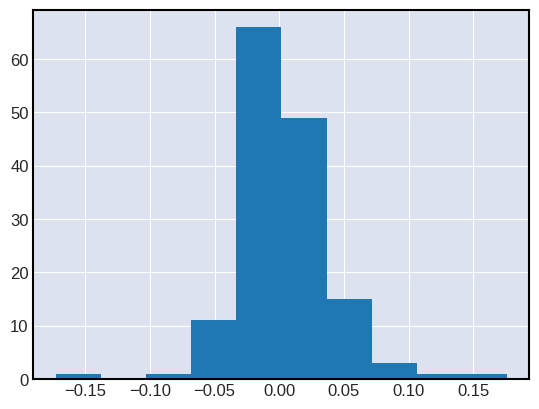

In [20]:
# Daily Returns
set1['daily_return'] = np.log(set1['Adj Close'] / set1['Adj Close'].shift(1))
set2['daily_return'] = np.log(set2['Adj Close'] / set2['Adj Close'].shift(1))
# Histogram
plt.hist(set1['daily_return'])
plt.show()

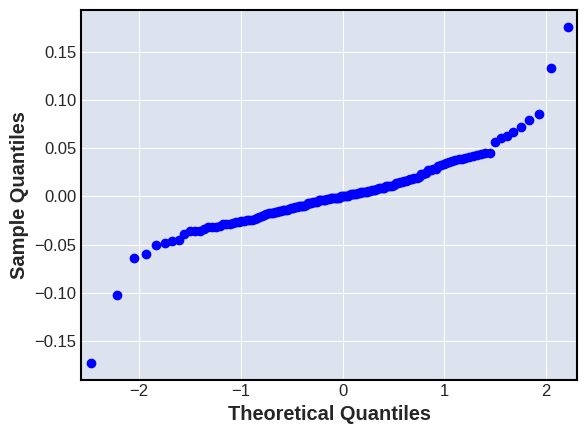

In [21]:
# QQ Plot
qqplot(set1['daily_return'], line='s')
plt.show()

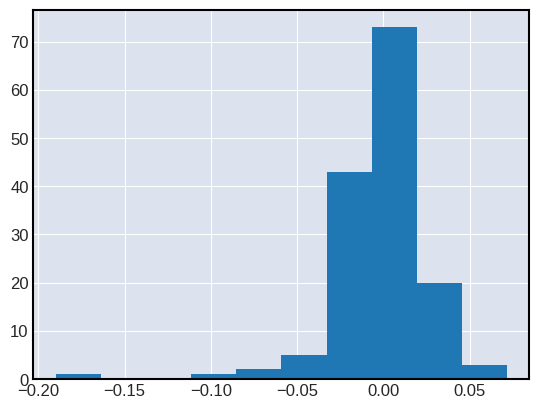

In [22]:
# Histogram
plt.hist(set2['daily_return'])
plt.show()

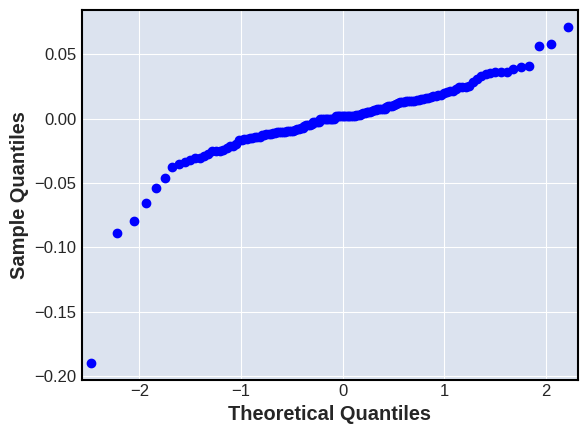

In [23]:
# QQ Plot
qqplot(set2['daily_return'], line='s')
plt.show()